In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
%matplotlib inline

In [49]:
import pandas as pd    

file_1 = pd.read_csv('JaganData/3C4-S11td-072817.dat', names = ['x', 'y' , 'bad'], skiprows = 3)
file_1 = file_1[['x', 'y']]
print(file_1)

                  x          y
0     -1.000000e-09  -5.197910
1     -9.333167e-10  -5.192281
2     -8.666333e-10  -5.186698
3     -7.999500e-10  -5.181161
4     -7.332667e-10  -5.175669
5     -6.665833e-10  -5.170223
6     -5.999000e-10  -5.164823
7     -5.332167e-10  -5.159468
8     -4.665333e-10  -5.154159
9     -3.998500e-10  -5.148895
10    -3.331667e-10  -5.143677
11    -2.664833e-10  -5.138505
12    -1.998000e-10  -5.133378
13    -1.331167e-10  -5.128296
14    -6.643333e-11  -5.123260
15     2.500000e-13  -5.118270
16     6.693333e-11  -5.113324
17     1.336167e-10  -5.108425
18     2.003000e-10  -5.103571
19     2.669833e-10  -5.098762
20     3.336667e-10  -5.093998
21     4.003500e-10  -5.089280
22     4.670333e-10  -5.084607
23     5.337167e-10  -5.079980
24     6.004000e-10  -5.075398
25     6.670833e-10  -5.070861
26     7.337667e-10  -5.066369
27     8.004500e-10  -5.061923
28     8.671333e-10  -5.057522
29     9.338167e-10  -5.053166
...             ...        ...
59971  3

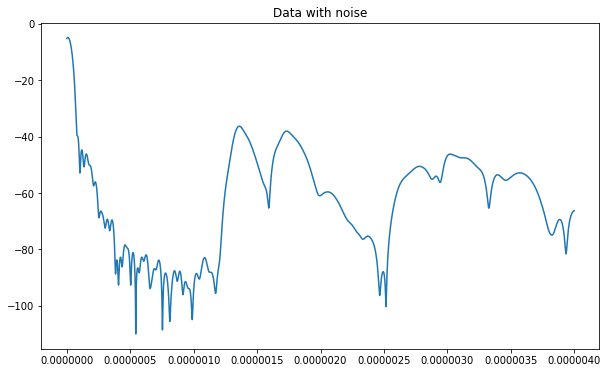

In [50]:
pyplot.figure(figsize=(10,6))
pyplot.plot(file_1['x'], file_1['y'])
pyplot.title("Data with noise")

In [2]:
pts=100 
x=np.linspace(-5,5,num=pts)
yactual_1 = np.sin(x * 0.5*np.pi)
yactual_2 = -(0.5 * (x-2))**2
yactual_3 = -(0.5* (x+2))**2
yactual_4 = yactual_1 + yactual_2 + yactual_3

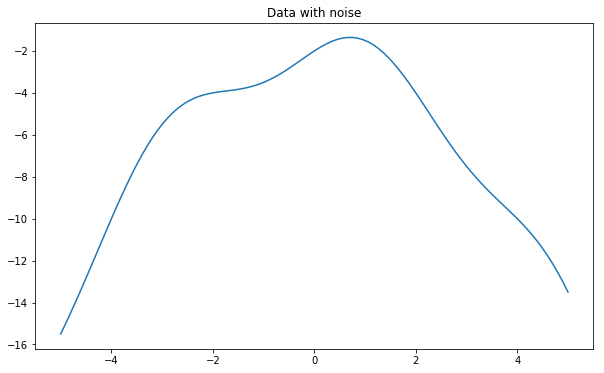

In [3]:
pyplot.figure(figsize=(10,6))
pyplot.plot(x, yactual_4)
pyplot.title("Data with noise")


Peak
x value: 7.468783333333332e-09

Inflection point
x value: 8.215411666666666e-08

Peak
x value: 1.169628166666667e-07

Peak
x value: 1.527050833333333e-07

Inflection point
x value: 1.7977851666666673e-07

Peak
x value: 2.233227333333333e-07

Peak
x value: 2.674004166666666e-07

Peak
x value: 3.187465833333333e-07

Peak
x value: 3.553557333333333e-07

Peak
x value: 3.932985499999999e-07

Peak
x value: 4.223724833333333e-07

Peak
x value: 4.584481666666666e-07

Inflection point
x value: 4.762526166666666e-07

Peak
x value: 5.213972333333333e-07

Peak
x value: 5.583398e-07

Peak
x value: 5.910146333333333e-07

Peak
x value: 6.240895666666666e-07

Peak
x value: 6.902394333333333e-07

Peak
x value: 7.2458135e-07

Peak
x value: 7.777279666666666e-07

Peak
x value: 8.486123499999998e-07

Peak
x value: 8.898893333333332e-07

Peak
x value: 9.347005333333332e-07

Inflection point
x value: 9.603736166666665e-07

Peak
x value: 1.0212555e-06

Peak
x value: 1.08587165e-06

Peak
x value: 1.1338

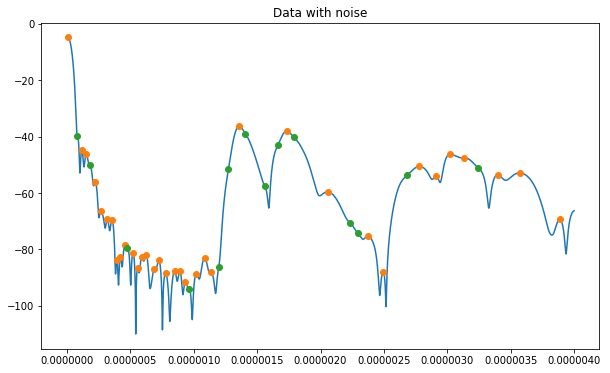

In [57]:
yactual_4 = file_1['y']
x = file_1['x']

dy = np.diff(yactual_4)
dydy = np.diff(dy)

x_list = x[2:].tolist()
y_list = yactual_4[2:].tolist()
dy_list = dy[1:].tolist()
dydy_list = dydy.tolist()
    
all_lists = pd.DataFrame(
    {'x':x_list,
     'y': y_list,
     'dy': dy_list,
     'dydy': dydy_list}
)


inflection_points_x = []
inflection_points_index = []
peaks_index = []
peaks_x = []

for i in range(0, len(all_lists)-1):
    
    first_derivative = all_lists.iloc[i-1]['dy'] >= 0 >= all_lists.iloc[i]['dy']
    first_derivative_positive = all_lists.iloc[i-1]['dy'] > 0
    first_derivative_negative = all_lists.iloc[i-1]['dy'] < 0
    second_derivative_positive = all_lists.iloc[i-1]['dydy'] <= 0 <= all_lists.iloc[i]['dydy']
    second_derivative_negative = all_lists.iloc[i-1]['dydy'] >= 0 >= all_lists.iloc[i]['dydy']
    
    if first_derivative:
        print '\nPeak'
        print 'x value: ' + str(all_lists.iloc[i]['x'])
        i_peak = i
        peaks_index.append(i)
        peaks_x.append(all_lists.iloc[i]['x'])

    if first_derivative_positive and second_derivative_positive:
        print '\nInflection point'
        print 'x value: ' + str(all_lists.iloc[i]['x'])
        i_negative = i
        inflection_points_index.append(i)
        inflection_points_x.append(all_lists.iloc[i]['x'])

        
    if not first_derivative_positive and second_derivative_negative:
        print '\nInflection point'
        print 'x value: ' + str(all_lists.iloc[i]['x'])
        i_positive = i
        inflection_points_index.append(i)
        inflection_points_x.append(all_lists.iloc[i]['x'])
        
pyplot.figure(figsize=(10,6))
pyplot.plot(x, yactual_4)
pyplot.plot(x[peaks_index], yactual_4[peaks_index], 'o')
pyplot.plot(x[inflection_points_index], yactual_4[inflection_points_index], 'o')
pyplot.title("Data with noise")

In [15]:
print 'x value of inflection points'
print inflection_points
print '\nx value of peaks'
print peaks

x value of inflection points
[-1.5656565656565657, 3.8888888888888893]

x value of peaks
[0.7575757575757578]


In [9]:
all_lists

,dy,dydy,x,y
0,0.527114,0.014604,-4.797980,-14.460376
1,0.540779,0.013665,-4.696970,-13.919598
2,0.552905,0.012126,-4.595960,-13.366693
3,0.562932,0.010027,-4.494949,-12.803760
4,0.570352,0.007420,-4.393939,-12.233409
5,0.574721,0.004369,-4.292929,-11.658688
6,0.575674,0.000953,-4.191919,-11.083014
7,0.572930,-0.002744,-4.090909,-10.510083
8,0.566302,-0.006628,-3.989899,-9.943781
9,0.555701,-0.010602,-3.888889,-9.388080


In [ ]:
from scipy.signal import savgol_filter
savgol_filter()